In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from datasets import load_dataset
import evaluate
import tqdm
from pylatexenc.latex2text import LatexNodes2Text


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-06-11 08:55:22,866] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
full_correct = []
for checkpoint in [311, 1557, 3110]:
    model_path = f"../ckpts/gsm8k_fft_full_constantlr/checkpoint-{str(checkpoint)}/"        
    correct = (np.load(os.path.join(model_path, "train_answer_types.npy"))==0)
    full_correct.append(correct)
full_correct = np.array(full_correct)

In [5]:
full_correct.shape

(3, 7473, 100)

(array([1671., 1042.,  935.,  944.,  747.,  673.,  572.,  397.,  300.,
         192.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

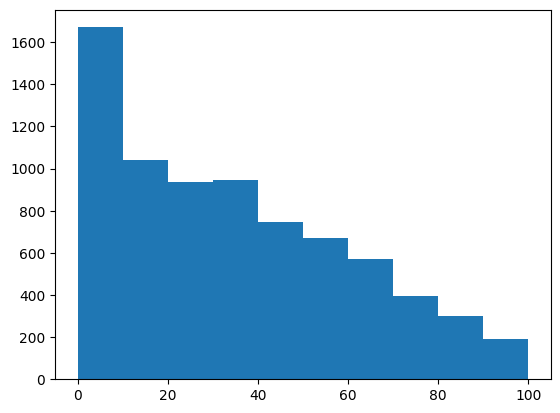

In [7]:
plt.hist(full_correct.mean(axis=0).sum(axis=-1))

In [26]:
(full_correct[1].sum(axis=-1)>=1).mean()

# 0 1 5 20

0.9096748293857888

In [9]:
full_correct.mean(axis=0).sum(axis=-1).shape

(7473,)

In [2]:
answers_all = np.load("../ckpts/math_fft_full_reformat/test_answers.npy")

In [3]:
answers_all

array([[' A function will have a vertical asymptote where the denominator is zero and the degree of that root is greater than the degree of the leading (x^2) coefficient. Since the denominator is zero at x=-6, the degree of the leading coefficient is 2 and the degree of the denominator is -1. Therefore, there is only ####1#### vertical asymptote.'],
       [' Using dimensional analysis, 120% of 30 is 30· 1.2=36, and 130% of 20 is 20· 1.3=26. Thus, the positive difference between the two is 26-36=####-10####.'],
       [' First, we note that x must be positive, since otherwise ⌈ x ⌉ + x is nonpositive. Next, since ⌈ x ⌉ is an integer, it follows that ⌈ x ⌉ = 23. Therefore, x = 23 · 24/2 = ####121/2####.'],
       ...,
       [' From the given information, 𝐚 + 𝐛 + 𝐜 = 0, and\n\n 𝐚 + 𝐛 = -𝐜.\nThen\n\n 𝐚 + 𝐛 + 𝐜 = 0, \n 𝐚 + 𝐛 = -𝐜 = -𝐛, \n 𝐚 + 𝐛 = -𝐜 + 𝐚 = -𝐚.\nSolving, we find\n\n 𝐚·𝐛 + 𝐚·𝐜 + 𝐛·𝐜 = ####-24####.\n'],
       [' From the given equation,\n\n cos19x^∘ = cos96^∘ + sin96^∘cos96^

In [7]:


def reformat_final_answer(response):
    try:
        start1 = response.rindex("\\boxed{")
        start2 = start1 + len("\\boxed{")
        end = response.rindex("}")
    except:
        print(response)
        start1 = response.rindex("\\boxed")
        start2 = start1 + len("\\boxed")
        end = response.rindex("$")
    return response[start2:end].replace("\\endalign*", "")
    
def answer_type_individial(output , answer):
    if output[-len(" </s>"):] == " </s>":
        output = output[: -len(" </s>")]
    if output[-len("</s>"):] == "</s>":
        output = output[: -len("</s>")]
    
    answer = LatexNodes2Text().latex_to_text(reformat_final_answer(answer))
    print(answer)
    # output_answer_start_idx = output.find("\\boxed{")
    # output_answer_end_idx = output.find("}", output_answer_start_idx+len("\\boxed{"))
    output_answer_start_idx = output.find("####")
    output_answer_end_idx = output.find("####", output_answer_start_idx+len("####"))
    if output_answer_start_idx != -1 and output_answer_end_idx != -1:
        # output = output[output_answer_start_idx+len("\\boxed{"):output_answer_end_idx]
        output = output[output_answer_start_idx+len("####"):output_answer_end_idx].replace("\\endalign*", "")
        print(output)

        if output == answer:
            answer_type = 0
        else:
            answer_type = 1
    else:
        answer_type = 2
    return answer_type


answer_types_all = []
# answers_all = []
for i in range(len(answers_all)):
    answer_types = []
    for item in answers_all[i]:
        answer_type = answer_type_individial(item, test_answers[i])
        answer_types.append(answer_type)
    answer_types_all.append(answer_types)

NameError: name 'LatexNodes2Text' is not defined

In [9]:
answer_types_all.shape

AttributeError: 'list' object has no attribute 'shape'

In [21]:
(np.array(answer_types_all)==0).mean()

0.0384

In [79]:
test_answers = np.load("../ckpts/math_fft_full_reformat/test_answers.npy")

In [80]:
test_answers[13]

array([' The midpoint of a segment with endpoints (x_1, y_1), (x_2, y_2) is (x_1 + x_2/2, y_1 + y_2/2).\n\nThus, the midpoint of the segment is (1+1/2, 4+10/2), which simplifies to (1,6). Thus, the sum of the coordinates of the midpoint is ####7####.',
       ' The midpoint of a line segment with endpoints (x_1, y_1), (x_2, y_2) is (x_1 + x_2/2, y_1 + y_2/2).\n\nThus, the midpoint of the segment is (1 + 10/2, 4 + 10/2), which simplifies to (5,6). Thus, the sum of the coordinates of the midpoint is 5 + 6 = ####11####.',
       ' The midpoint of a line segment with endpoints (x_1, y_1), (x_2, y_2) is (x_1 + x_2/2, y_1 + y_2/2).\n\nThus, the midpoint of this segment is (1+1/2, 4+10/2), which simplifies to (1,6). Thus, the sum of the coordinates of the midpoint is 1+6=####7####.',
       ' The midpoint of a segment with endpoints (x_1, y_1), (x_2, y_2) is (x_1 + x_2/2, y_1 + y_2/2).\n\nThus, the midpoint of this segment is (1+1/2, 4+1/2), which simplifies to (1,5). Thus, the sum of the coo

In [5]:
dataset = load_dataset("hendrycks/competition_math")

train_questions = np.array(dataset["train"]["problem"])

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [6]:
# train_answers = np.array(dataset["train"]['solution'])
test_answers = np.array(dataset["test"]['solution'])


In [107]:
def extract_latex(text):
    start = text.rindex("\\boxed{")+len("\\boxed{")
    end = text.rindex("}")
    return text[start:end]

In [108]:
test_answers = [extract_latex(a) for a in test_answers]

In [110]:
test_answers = [LatexNodes2Text().latex_to_text(a) for a in test_answers]

In [111]:
test_answers

['2',
 '10',
 '97',
 'i',
 '4',
 '402',
 'x ∈[-2,7]',
 '7',
 '4,6,14,15',
 '-1/8',
 'x+2/7',
 '-15',
 '10',
 '8',
 '75',
 '11/2',
 '-25',
 '8',
 '3',
 '187.5',
 '18',
 '$40',
 '5',
 '8',
 '3125',
 '[0,∞)',
 '.5',
 '12, 10, 6',
 '5',
 '16',
 '2300',
 '5',
 '105',
 '-13.5',
 '243/625',
 '2',
 '(-√(3), √(3))',
 '23',
 '49',
 '2x^9 - 8x^7 + 9x^6 - 16x^5 - 12x^4 + 9x^3 - 24x^2.\n\\endalign*',
 '(-∞,-8)∪(8,∞)',
 '0',
 '2',
 '16',
 '1/12',
 '6+9i',
 '2',
 '20',
 '7(x+3) (x-3)',
 'y^4-2y^3+7y^2+y-5',
 '4',
 '0',
 '12',
 '7/2',
 '69',
 '5',
 '(-∞,-1/2)∪(-1/2,∞)',
 '2/5',
 '7',
 '20',
 '7',
 '√(x).\n\\endalign*',
 '78',
 '9',
 '4',
 '6',
 '17',
 '(1,9/2)',
 '15/2',
 '-2',
 '8',
 '20',
 '24\n\\endalign*',
 '19/4',
 '5',
 '-55',
 '60.\n\\endalign*',
 '-7\n\\endalign*',
 '0.43',
 '108',
 '4950',
 '50',
 '14',
 '8',
 '26',
 '129',
 '0',
 '-5',
 '2.\n\\endalign*',
 '4',
 '30',
 '161.\n\\endalign*',
 '1',
 '5\n\\endalign*',
 '3s^2.\n\\endalign*',
 '125',
 '8',
 '286',
 '(9,11)',
 '15',
 '1',
 '0',
 '6

In [86]:
test_answers

['2',
 '10',
 '\\dfrac{9',
 'i',
 '4',
 '402',
 'x \\in [-2,7]',
 '7',
 '4,6,14,15',
 '-\\frac{1',
 '\\frac{x+2',
 '-15',
 '10',
 '8',
 '75',
 '\\frac{11',
 '-25',
 '8',
 '3',
 '187.5',
 '18',
 '\\$40',
 '5',
 '8',
 '3125',
 '[0,\\infty)',
 '.5',
 '12, 10, 6',
 '5',
 '16',
 '2300',
 '5',
 '105',
 '-13.5',
 '\\frac{243',
 '2',
 '(-\\sqrt{3',
 '23',
 '49',
 '2x^9 - 8x^7 + 9x^6 - 16x^5 - 12x^4 + 9x^3 - 24x^2',
 '(-\\infty,-8)\\cup (8,\\infty)',
 '0',
 '2',
 '16',
 '\\frac{1',
 '6+9i',
 '2',
 '20',
 '7(x+3) (x-3)',
 'y^4-2y^3+7y^2+y-5',
 '4',
 '0',
 '12',
 '\\frac{7',
 '69',
 '5',
 '\\left(-\\infty,-\\frac 12\\right)\\cup \\left(-\\frac 12,\\infty\\right)',
 '\\frac{2',
 '7',
 '20',
 '7',
 '\\sqrt{x',
 '78',
 '9',
 '4',
 '6',
 '17',
 '\\left(1,\\frac{9',
 '\\frac{15',
 '-2',
 '8',
 '20',
 '24',
 '\\frac{19',
 '5',
 '-55',
 '60',
 '-7',
 '0.43',
 '108',
 '4950',
 '50',
 '14',
 '8',
 '26',
 '129',
 '0',
 '-5',
 '2',
 '4',
 '30',
 '\\frac{2\\sqrt{53',
 '1',
 '5',
 '3s^2',
 '125',
 '8',
 '286'

In [75]:
latex

'Solve for $x$: $(x-4)^3=\\left(\\frac18\\right)^{-1}$'

In [76]:
def reformat_final_answer(response):
    start1 = response.find("\\boxed{")
    start2 = start1 + len("\\boxed{")
    end = response.find("}", start2)
    new_response = response[:end] + "####" + response[end+1:]
    new_response = new_response[:start1] + "####" + new_response[start2:]
    return new_response

In [78]:
(re.sub(' +', ' ', LatexNodes2Text().latex_to_text((latex))))

'Solve for x: (x-4)^3=(1/8)^-1'

In [77]:
(re.sub(' +', ' ', LatexNodes2Text().latex_to_text(reformat_final_answer(latex))))

'Solve for x: (x-4)^3=(1/8)^-1########for x: (x-4)^3=(1/8)^-1####'

In [114]:
name = "gsm8k_fft_full_constantlr"

checkpoints2 = [311, 934, 1557, 3110]
full_accs = []


for checkpoint in checkpoints2:
   answer_types_all = np.load(f"../ckpts/{name}/checkpoint-{str(checkpoint)}/train_answer_types.npy")
   acc = (answer_types_all==0).mean(axis=-1)
#    print(acc)
   full_accs.append(acc)
   
full_accs = np.array(full_accs)

In [75]:
full_accs.shape

(4, 7473)

(array([2223.,  817.,  670.,  436.,  455.,  449.,  415.,  409.,  528.,
        1071.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

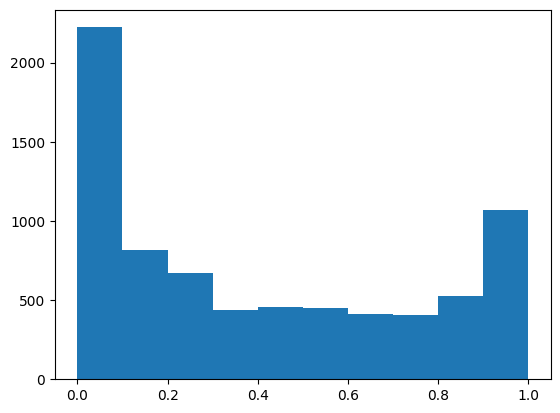

In [90]:
plt.hist(full_accs[2])

(array([4011.,  946.,  585.,  359.,  372.,  311.,  267.,  219.,  208.,
         195.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

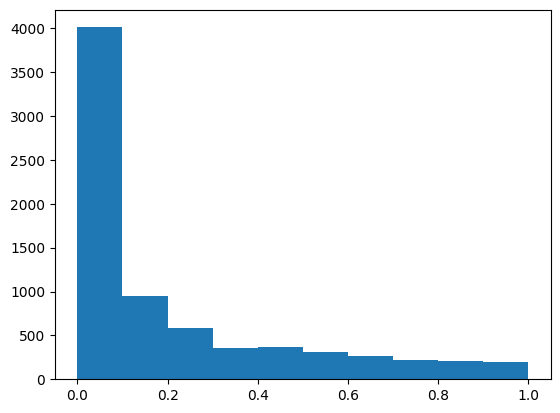

In [86]:
plt.hist(full_accs[0])

In [94]:
(full_accs[3]==0).mean()

0.0865783487220661

In [89]:
(full_accs[0]==1).mean()

0.0028101164191087916

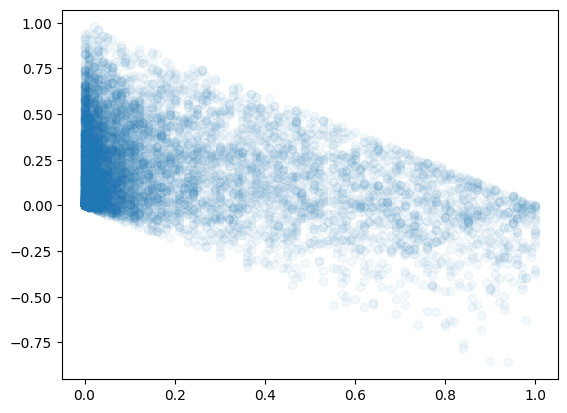

In [98]:
plt.scatter(full_accs[0], np.mean(full_accs[1:], axis=0)-full_accs[0], alpha=0.05)

In [7]:
dataset = load_dataset("gsm8k", "main")

train_answers = np.array(dataset["train"]['answer'])

In [72]:
train_answers[0]

'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'

In [9]:
answers_all = np.load(f"../ckpts/{name}/checkpoint-{str(311)}/train_answers.npy")

In [24]:
references =[train_answers[0]]
references
np.repeat(references, 4, axis=0)

array(['Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72',
       'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72',
       'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72',
       'Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'],
      dtype='<U126')

In [44]:
# Load the ROUGE evaluation metric
rouge = evaluate.load('rouge')


rouge1_all = []
rouge2_all = []
rougeL_all = []
rougeLsum_all = []
for idx in tqdm.tqdm(range(500)):
    predictions =  answers_all[idx]
    references =[train_answers[idx]]
    references = np.repeat(references, 100, axis=0)

    # Compute the ROUGE score
    results = rouge.compute(predictions=predictions, references=references, use_aggregator=False)
    
    rouge1_all.append(results['rouge1'])
    rouge2_all.append(results['rouge2'])
    rougeL_all.append(results['rougeL'])
    rougeLsum_all.append(results['rougeLsum'])




100%|██████████| 500/500 [08:23<00:00,  1.01s/it]


In [46]:
rouge1_all = np.array(rouge1_all)
rouge2_all = np.array(rouge2_all)
rougeL_all = np.array(rougeL_all)
rougeLsum_all = np.array(rougeLsum_all)

In [49]:
accs = np.load(f"../ckpts/{name}/checkpoint-{str(311)}/train_answer_types.npy") == 0

In [70]:
idx = 10

acc_rouge1s = []
inacc_rouge1s = []
for idx in range(100):
    acc_rouge1s = np.concatenate([acc_rouge1s, rougeL_all[idx][np.where(accs[idx])[0]]])
    inacc_rouge1s = np.concatenate([inacc_rouge1s, rougeL_all[idx][np.where(accs[idx]==0)[0]]])


(array([  57.,  644., 1808., 2145., 1596., 1059.,  454.,  178.,   71.,
          31.]),
 array([0.01923077, 0.10834218, 0.19745358, 0.28656499, 0.37567639,
        0.4647878 , 0.5538992 , 0.64301061, 0.73212202, 0.82123342,
        0.91034483]),
 <BarContainer object of 10 artists>)

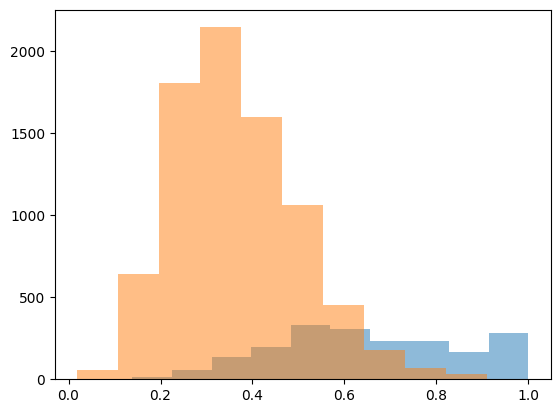

In [71]:
# plt.hist(rouge1_all[idx][np.where(accs[idx])[0]], alpha=0.5)
# plt.hist(rouge1_all[idx][np.where(accs[idx]==0)[0]], alpha=0.5)

plt.hist(acc_rouge1s, alpha=0.5)
plt.hist(inacc_rouge1s, alpha=0.5)

In [50]:
accs.shape

(7473, 100)

In [51]:
accs[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True])

In [47]:
rouge1_all[0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.92592593, 0.92592593, 0.91666667, 0.91666667, 0.91666667,
       0.92592593, 0.94117647, 0.91666667, 0.96153846, 0.96153846,
       0.96153846, 0.96153846, 1.        , 0.88888889, 0.96153846,
       0.96153846, 0.88888889, 0.96153846, 0.90196078, 0.89285714,
       0.96153846, 0.90566038, 0.9122807 , 0.88      , 0.96153846,
       0.85714286, 0.94117647, 0.96153846, 0.96153846, 0.82539683,
       0.75757576, 0.82539683, 0.90909091, 0.94339623, 0.84210526,
       0.88888889, 0.9122807 , 0.96153846, 0.80645161, 0.83333333,
       0.79365079, 0.80645161, 0.91666667, 0.73529412, 0.83333

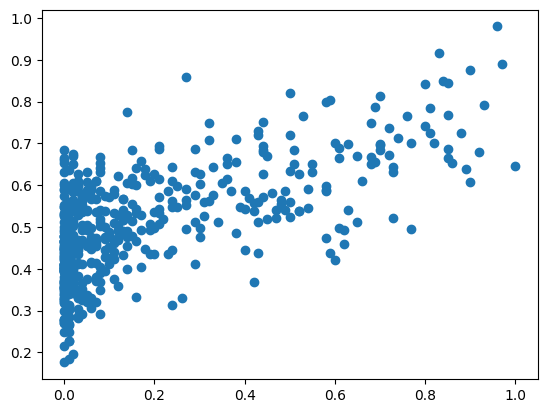

In [43]:
plt.scatter(full_accs[0, :500], rouge1_all)

(array([2079.,  748.,  630.,  469.,  438.,  485.,  402.,  367.,  548.,
        1307.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

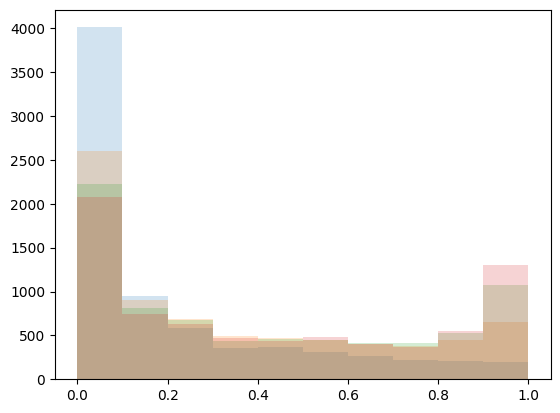

In [11]:
plt.hist(full_accs[0, :], alpha=0.2)
plt.hist(full_accs[1, :], alpha=0.2)
plt.hist(full_accs[2, :], alpha=0.2)
plt.hist(full_accs[3, :], alpha=0.2)

In [115]:
sorted_idxs = np.argsort(full_accs.mean(axis=0))

In [116]:
full_rouges = []
for checkpoint in [311, 934, 1557, 3110]:
    rouge_dict = np.load(f"../ckpts/gsm8k_fft_full_constantlr/checkpoint-{str(checkpoint)}/train_rouge.npy", allow_pickle=True).item()
    full_rouges.append(rouge_dict["rougeL"])
full_rouges = np.array(full_rouges)
rouge_score = full_rouges.mean(axis=-1).mean(axis=0)
# sorted_idxs = np.argsort(rouge_score)

In [117]:
img = np.ones((full_accs.shape[0]*500, full_accs.shape[1]))*-1

In [118]:
for i in range(4):
    for j in range(i*500, (i+1)*500):
        img[j] = full_rouges[i].mean(axis=-1)[sorted_idxs]

([<matplotlib.axis.YTick at 0x7f599c689d60>,
 [Text(0, 0, '311'),
  Text(0, 500, '934'),
  Text(0, 1000, '1557'),
  Text(0, 1500, '3110')])

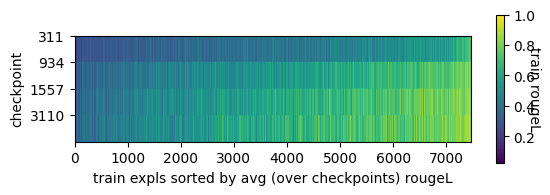

In [119]:
im = plt.imshow(img)
cbar = plt.colorbar(shrink=0.4)
cbar.set_label('train rougeL', rotation=270)

plt.xlabel("train expls sorted by avg (over checkpoints) rougeL")
plt.ylabel("checkpoint")
plt.yticks([0, 500, 1000, 1500], [311, 934, 1557, 3110])

([<matplotlib.axis.YTick at 0x7fb2bba7eee0>,
 [Text(0, 0, '311'),
  Text(0, 500, '934'),
  Text(0, 1000, '1557'),
  Text(0, 1500, '3110')])

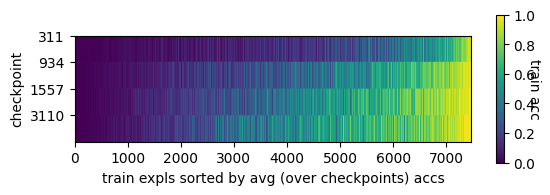

In [38]:
im = plt.imshow(img)
cbar = plt.colorbar(shrink=0.4)
cbar.set_label('train acc', rotation=270)

plt.xlabel("train expls sorted by avg (over checkpoints) accs")
plt.ylabel("checkpoint")
plt.yticks([0, 500, 1000, 1500], [311, 934, 1557, 3110])

In [103]:
import os
checkpoints = ["00500", "05000", "10000", "15000", "20000", "45000", "50000"]
num_correct_all = []
for checkpoint in checkpoints:
    model_path = f"../ckpts/sft_gsm8k_llama7B_full3/checkpoint_{checkpoint}/hf_model/"        
    num_correct = (np.load(os.path.join(model_path, "train_answer_types_16.npy"))==0).sum(axis=-1)/16
    num_correct_all.append(num_correct)
num_correct_all = np.array(num_correct_all)
num_correct_all = np.mean(num_correct_all, axis=0)

In [40]:
num_correct_all.shape

(7473,)

In [41]:
full_accs.shape

(4, 7473)

Text(0.5, 1.0, 'train examples')

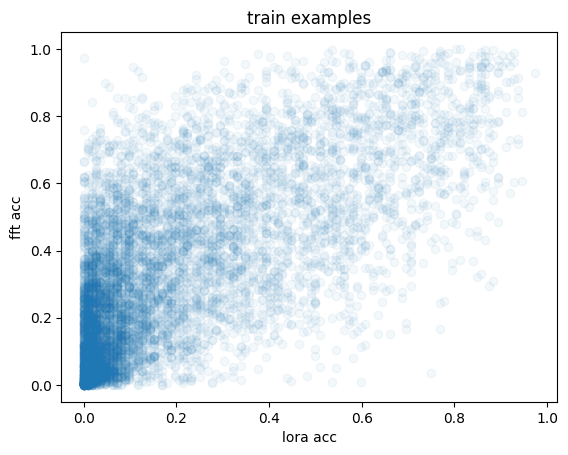

In [106]:
plt.scatter(num_correct_all, full_accs.mean(0), alpha=0.05)
plt.xlabel("lora acc")
plt.ylabel("fft acc")
plt.title("train examples")